In [203]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [204]:
import librosa
import librosa.display
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt


In [205]:
import IPython
from util.draw import draw_filtered

recording_file = "/Users/duongtat/Work/_skola/VMM/tmp/7d3119ed1bb6bc9e65b3ed000.wav"
music_file = "/Users/duongtat/Work/_skola/VMM/dataset/REEBOKS OR THE NIKES [fbHxkNa7lhQ].wav"

recording, sr = librosa.load(recording_file)
music, sr = librosa.load(music_file)

IPython.display.Audio(recording_file)


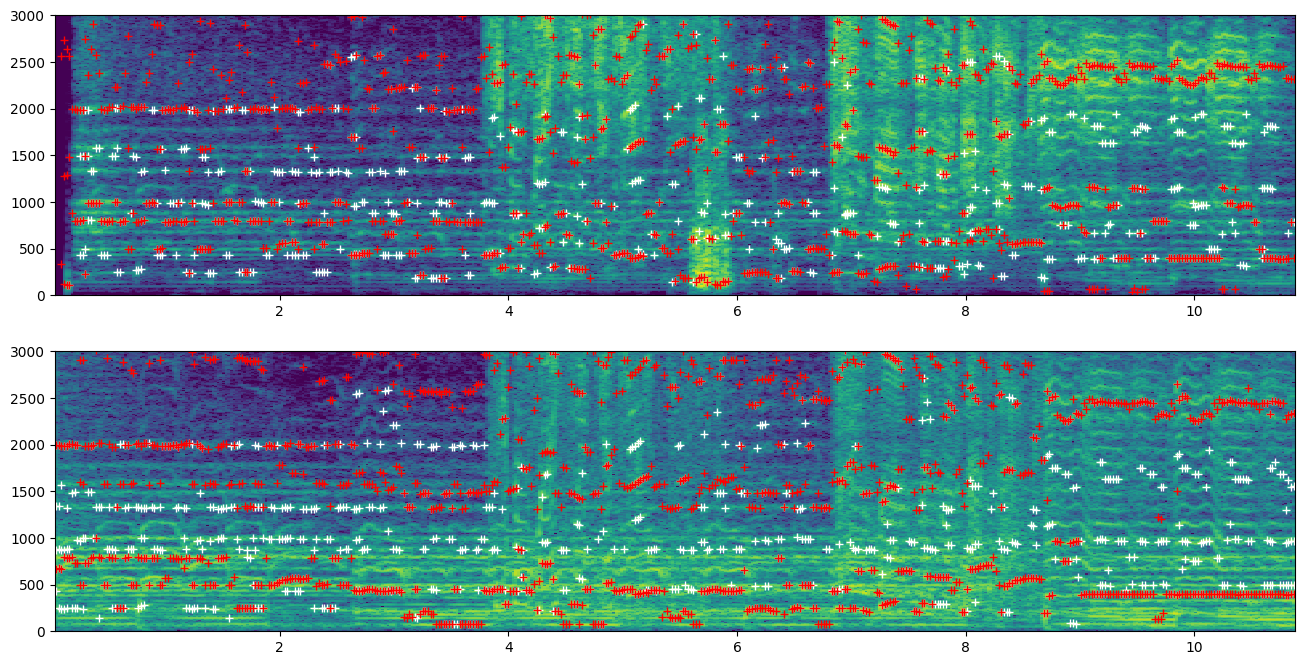

In [128]:
from freq.prominence import get_peak_frequencies_prominence as prominence
from freq.bands import get_peak_frequencies_bands as bands

fig, axs = plt.subplots(2, 1, figsize=(16, 8))

music_offset = int(sr * 4.25)
music_sample = music[music_offset: music_offset + recording.shape[-1]]

draw_filtered(
    recording, [
        (bands, {"marker": "+", "c": "w"}),
        (prominence, {"marker": "+", "c": "r"}),
    ], fig=axs[0]
)

draw_filtered(
    music_sample, [
        (bands, {"marker": "+", "c": "w"}),
        (prominence, {"marker": "+", "c": "r"}),
    ], fig=axs[1]
)

IPython.display.Audio(data=music_sample, rate=sr)


In [199]:
from hash.cluster import get_hashes_from_peaks_cluster as cluster
from util.compare import compare_fingerprints


hash_kwargs = {
    "window_size": 3,
    "gap_size": 0
}

music_peaks = cluster(
    prominence(music),
    **hash_kwargs
)
music_sample_peaks = cluster(
    prominence(music_sample),
    **hash_kwargs
)
recording_peaks = cluster(
    prominence(recording),
    **hash_kwargs
)

display(compare_fingerprints(music_peaks, recording_peaks))
display(compare_fingerprints(music_sample_peaks, recording_peaks))


(43, 81250, 3738)

(51, 3903, 3738)

In [197]:
from hash.fanout import get_hashes_from_peaks_fanout as fanout

fanout(bands(music))


[{'time': 0.09287981859410431, 'hash': '3122,5243,430'},
 {'time': 0.09287981859410431, 'hash': '3122,430,925'},
 {'time': 0.09287981859410431, 'hash': '3122,925,1754'},
 {'time': 0.09287981859410431, 'hash': '3122,1754,3133'},
 {'time': 0.09287981859410431, 'hash': '3122,3133,4403'},
 {'time': 0.09287981859410431, 'hash': '3122,4403,226'},
 {'time': 0.09287981859410431, 'hash': '3122,226,473'},
 {'time': 0.09287981859410431, 'hash': '3122,473,925'},
 {'time': 0.09287981859410431, 'hash': '3122,925,1754'},
 {'time': 0.09287981859410431, 'hash': '3122,1754,3229'},
 {'time': 0.09287981859410431, 'hash': '5243,430,925'},
 {'time': 0.09287981859410431, 'hash': '5243,925,1754'},
 {'time': 0.09287981859410431, 'hash': '5243,1754,3133'},
 {'time': 0.09287981859410431, 'hash': '5243,3133,4403'},
 {'time': 0.09287981859410431, 'hash': '5243,4403,226'},
 {'time': 0.09287981859410431, 'hash': '5243,226,473'},
 {'time': 0.09287981859410431, 'hash': '5243,473,925'},
 {'time': 0.09287981859410431, '

In [200]:
hash_kwargs = {
    "window_size": 3,
    "gap_size": 0
}

music_peaks = cluster(
    bands(music),
    **hash_kwargs
)
music_sample_peaks = cluster(
    bands(music_sample),
    **hash_kwargs
)
recording_peaks = cluster(
    bands(recording),
    **hash_kwargs
)

display(compare_fingerprints(music_peaks, recording_peaks))
display(compare_fingerprints(music_sample_peaks, recording_peaks))


(18, 25803, 1178)

(16, 1268, 1178)